Nesse código vou pegar uma base do Kaggle "https://www.kaggle.com/christianlillelund/passenger-list-for-the-estonia-ferry-disaster", em que será realizado meu segundo teste de um modelo de classificação. 

Nessa abordagem vou fazer algumas explorações dos dados, e também vou tentar realizar alguns modelos preditivos:a Árvore de Decisão e RandomForest

E por irei colocar alguns dos métodos de medição de desempenho a partir da matriz de confusão assim como a Curva Roc

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT2PqqOXC0rxrkccRjTEFm8J-iR_ms1feWEQw&usqp=CAU)

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime 

## Primeiras impressões sobre nossos dados

In [2]:
df = pd.read_csv("estonia-passenger-list.csv")
df.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [3]:
# checando valores nulos
df.isna().sum()

PassengerId    0
Country        0
Firstname      0
Lastname       0
Sex            0
Age            0
Category       0
Survived       0
dtype: int64

Não temos valores nulos! Isso é bom!

In [4]:
# verificando os tipos de dados
df.dtypes

PassengerId     int64
Country        object
Firstname      object
Lastname       object
Sex            object
Age             int64
Category       object
Survived        int64
dtype: object

In [5]:
# dimensões da nossa tabela
df.shape

(989, 8)

In [6]:
# vamos verificar as estatísticas básicas do nosso df
df.describe()

,PassengerId,Age,Survived
count,989.000000,989.000000,989.000000
mean,494.992922,44.575329,0.138524
std,285.643660,17.235146,0.345624
min,1.000000,0.000000,0.000000
25%,248.000000,30.000000,0.000000
50%,495.000000,44.000000,0.000000
75%,742.000000,59.000000,0.000000
max,989.000000,87.000000,1.000000


Vamos remover colunas que não agregam nada em nossa análise, por exemplo Nome, sobrenome e PassagerId

In [7]:
df.drop(columns = ['PassengerId', 'Firstname', 'Lastname'], inplace = True)
df.head()

,Country,Sex,Age,Category,Survived
0,Sweden,M,62,P,0
1,Estonia,F,22,C,0
2,Estonia,F,21,C,0
3,Sweden,M,53,C,0
4,Sweden,F,55,P,0


Deixei a coluna Country por podemos explorar essa coluna com algumas visualizações :)

## Começando nossa EDA

- Hipóteses a serem levantadas:
    - Do total de pessoas a bordo, quais as suas nacionalidades ?
    - Qual país teve mais sobreviventes ? E não sobreviventes ?
    - Qual a idade média dos sobreviventes e não sobreviventes ? Os sobreviventes são os mais jovens ou não  ?
    - Qual a categoria obteve maior número de não sobreviventes ?
    - Homens morreram mais que as mulheres ?
    
Essa são umas das hipóteses que irei tentar levantar com os dados obtidos, é o que eu consegui pensar até agora

 - Do total de pessoas a bordo, quais as suas nacionalidades ?

In [8]:
df['Country'].unique()

array(['Sweden', 'Estonia', 'Latvia', 'Russia', 'Germany', 'Finland',
       'Great Britain', 'Morocco', 'Denmark', 'France', 'Netherlands',
       'Norway', 'Lithuania', 'Nigeria', 'Canada', 'Belarus'],
      dtype=object)

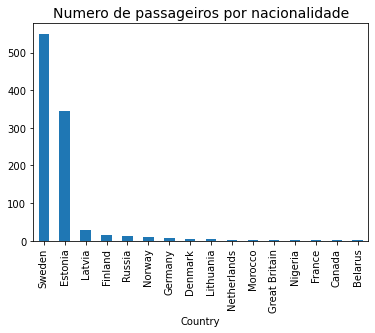

In [9]:
df.groupby('Country')['Survived'].count().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Numero de passageiros por nacionalidade', fontsize = 14);

Percebemos que a maioria dos passageiros a bordo são da Estônia ou Sueca.

Agora vamos testar a nossa segunda hipótese:
- Qual país teve mais sobreviventes ? E não sobreviventes ?

Para isso vou dividir o data set em dois sendo um com survived = 1 e o outro survived = 0

In [10]:
# dataset de sobreviventes
df_survived = df.loc[df['Survived'] == 1]
df_survived.head()

,Country,Sex,Age,Category,Survived
21,Estonia,M,32,C,1
31,Sweden,M,50,P,1
37,Latvia,M,36,P,1
44,Estonia,M,21,P,1
48,Estonia,M,21,P,1


In [11]:
# dataset de não sobreviventes
df_nsurvived = df.loc[df['Survived'] == 0]
df_nsurvived.head()

,Country,Sex,Age,Category,Survived
0,Sweden,M,62,P,0
1,Estonia,F,22,C,0
2,Estonia,F,21,C,0
3,Sweden,M,53,C,0
4,Sweden,F,55,P,0


Text(0, 0.5, 'Número de Passageiros')

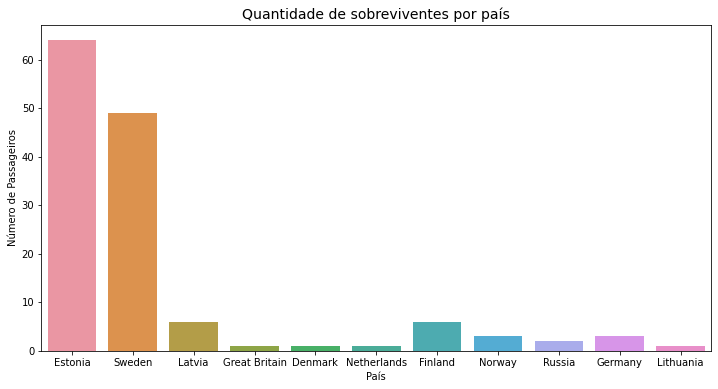

In [12]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'Country', data = df_survived)
ax.set_title('Quantidade de sobreviventes por país', fontsize = 14)
ax.set_xlabel('País')
ax.set_ylabel('Número de Passageiros')

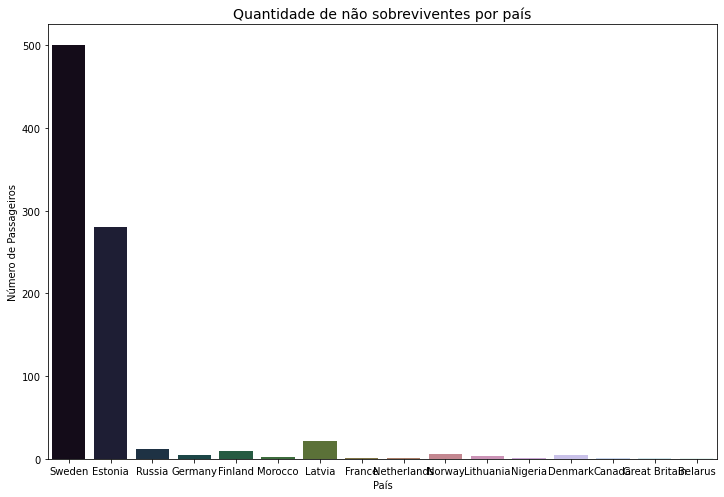

In [13]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x = 'Country', data = df_nsurvived, palette = 'cubehelix')
ax.set_title('Quantidade de não sobreviventes por país', fontsize = 14)
ax.set_xlabel('País')
ax.set_ylabel('Número de Passageiros');

Como podemos ver, o número de mortos foi bem maior que o número de sobreviventes, infelizmente.

E assim como esperado é meio óbvio que pela quantidade de passageiros a Suécia e Estônia estariam entre os primeiros tanto de sobreviventes quanto de não sobreviventes

Vamos para a nossa terceira hipótese:

- Qual a idade média dos sobreviventes e não sobreviventes ? Os sobreviventes são os mais jovens ou não ?

In [14]:
print('A idade média dos sobreviventes é:', round(df_survived['Age'].mean(),2) )
print('A idade média dos não sobreviventes é:', round(df_nsurvived['Age'].mean(),2) )

A idade média dos sobreviventes é: 34.01
A idade média dos não sobreviventes é: 46.27


Vamos ver tambem um boxplot das idades para os sobreviventes e os nao sobreviventes

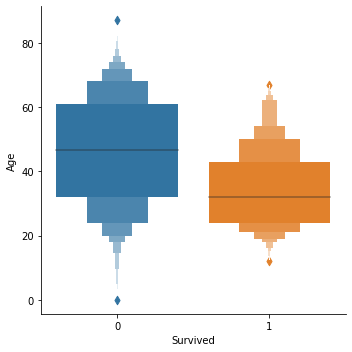

In [15]:
sns.catplot(data = df, x = 'Survived', y = 'Age', kind = 'boxen')

Conseguimos perceber que a mediana entre os dois boxplots estão bem distintos. Então é percebível que os sobreviventes normalmente **são mais jovens que os não sobreviventes**

Vamos para a nossa terceira hipótese:
- Qual a categoria obteve maior número de não sobreviventes ?

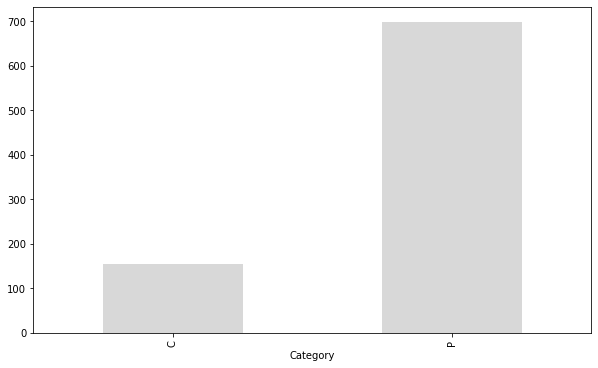

In [16]:
plt.figure(figsize = (10,6))
df_nsurvived.groupby('Category')['Survived'].count().plot(kind = 'bar', color = 'grey', alpha = 0.3)

A categoria com maior número de não sobreviventes é a categoria "P"

Vamos agora verificar a nossa última hipótese:
- Homens morreram mais que as mulheres ?

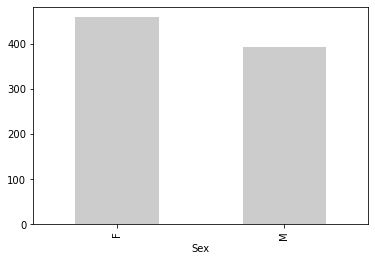

In [17]:
df_nsurvived.groupby('Sex')['Survived'].count().plot(kind = 'bar', color = 'grey', alpha = 0.4)

Então falso, a maioria dos não sobreviventes são mulheres com uma margem pequena ao contrário do dataset do Titanic.

Portanto, baseado na nossa análise exploratória, se o passageiro tiver uma idade relativamente alta, estando na categoria P (não importando tanto o sexo) essa pessoa ja possui uma probabilidade maior de não sobreviver.

## Inicializando nosso modelo!

Antes de inciar nosso modelo de Machine learning é preciso primeiro transformar as variáveis categóricas em numéricas. Para isso vou utilizar o pd.get_dummies

In [18]:
dummies = pd.get_dummies(df[['Category','Sex']])
dummies.head()

,Category_C,Category_P,Sex_F,Sex_M
0,0,1,0,1
1,1,0,1,0
2,1,0,1,0
3,1,0,0,1
4,0,1,1,0


In [19]:
df_full = pd.concat([df,dummies], axis = 1)

In [20]:
df_full.head()

,Country,Sex,Age,Category,Survived,Category_C,Category_P,Sex_F,Sex_M
0,Sweden,M,62,P,0,0,1,0,1
1,Estonia,F,22,C,0,1,0,1,0
2,Estonia,F,21,C,0,1,0,1,0
3,Sweden,M,53,C,0,1,0,0,1
4,Sweden,F,55,P,0,0,1,1,0


In [21]:
df_full.drop(columns = ['Sex', 'Category', 'Category_C', 'Sex_M','Country'], inplace = True)

In [22]:
df_full.head()

,Age,Survived,Category_P,Sex_F
0,62,0,1,0
1,22,0,0,1
2,21,0,0,1
3,53,0,0,0
4,55,0,1,1


Agora ja podemos dividir nossos dados!

In [23]:
# importando biblioteca
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_auc_score, f1_score,classification_report, accuracy_score

In [24]:
x = df_full.drop(columns = 'Survived')

In [25]:
y = df_full['Survived']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

## Decision Tree

In [27]:
## importanto biblioteca de Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [28]:
dt = DecisionTreeClassifier()

In [29]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

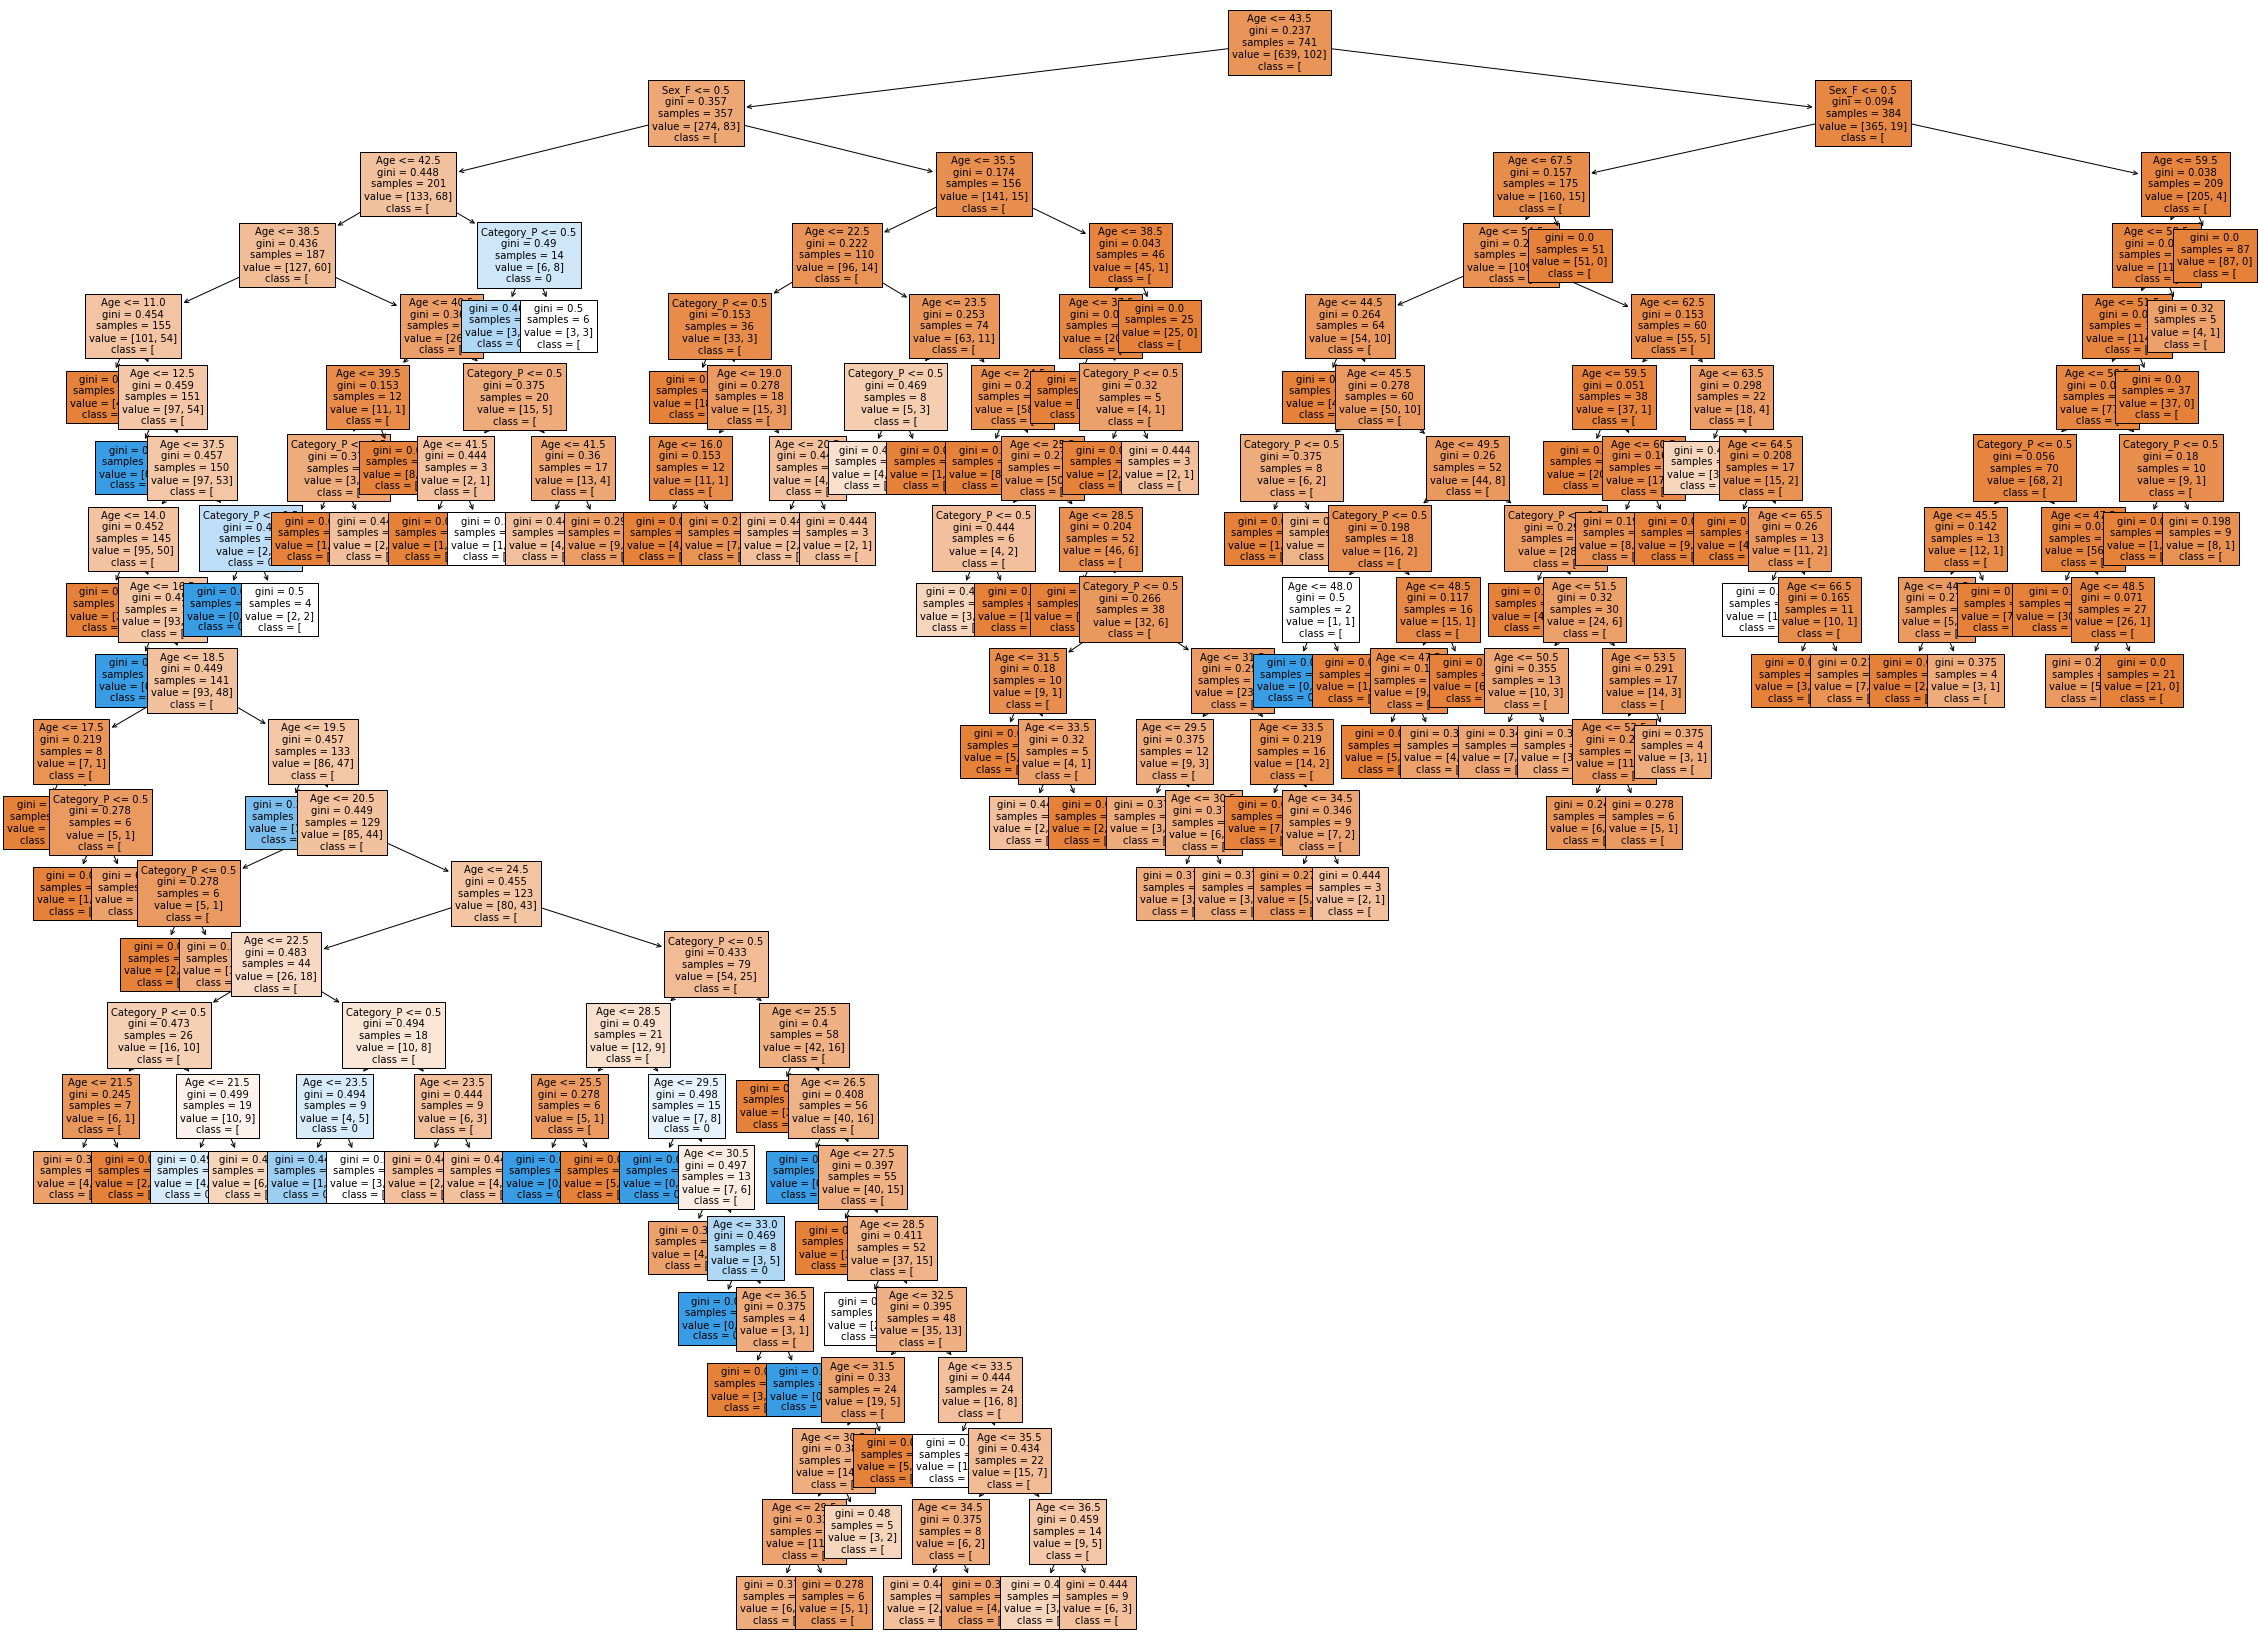

In [30]:
plt.figure(figsize=(40, 30))
plot_tree(dt, fontsize=10, filled=True,
          feature_names=x.columns, class_names=str(y.unique()))
plt.show()

In [31]:
# predizendo dados
y_pred = dt.predict(x_test)
# verificando o modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       213
           1       0.38      0.17      0.24        35

    accuracy                           0.84       248
   macro avg       0.62      0.56      0.57       248
weighted avg       0.80      0.84      0.82       248



In [32]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

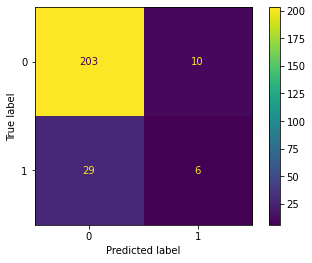

In [33]:
plot_confusion_matrix(dt, x_test, y_test);

Nossa tabela está assim

---------
VN   FP

FN   VP

--------

In [34]:
true = 203+6
false = 29 + 10
acc = true / (true + false)
print("A acuracidade do modelo é :", round(acc, 2)*100, "%")

A acuracidade do modelo é : 84.0 %


In [41]:
# precisão
# Precisão = VP / VP + FP
precisao = 6/(6+10)
print("A precisão do modelo é", round(precisao, 2)*100, "%")

A precisão do modelo é 38.0 %


In [43]:
# recall ou sensibilidade
# recall = VP / VP + FN
recall = 6 / (6+29)
print("o recall ou a sensibilidade do modelo é", round(recall, 2)*100, "%")

o recall ou a sensibilidade do modelo é 17.0 %


Com base nos dados obtidos através do recall e precisão observamos que não temos uma proporção muito alta com relação a classe **positiva**

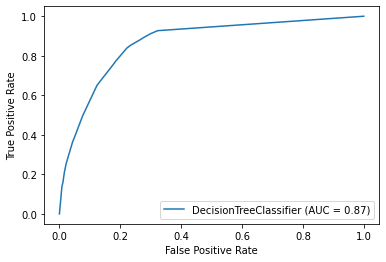

In [36]:
plot_roc_curve(dt, x, y);

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf =RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [39]:
# predizendo dados
y_pred_rf = rf.predict(x_test)
# verificando modelo
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       213
           1       0.38      0.17      0.24        35

    accuracy                           0.84       248
   macro avg       0.62      0.56      0.57       248
weighted avg       0.80      0.84      0.82       248

